## 针对特征为二元集，结果为一元集
### 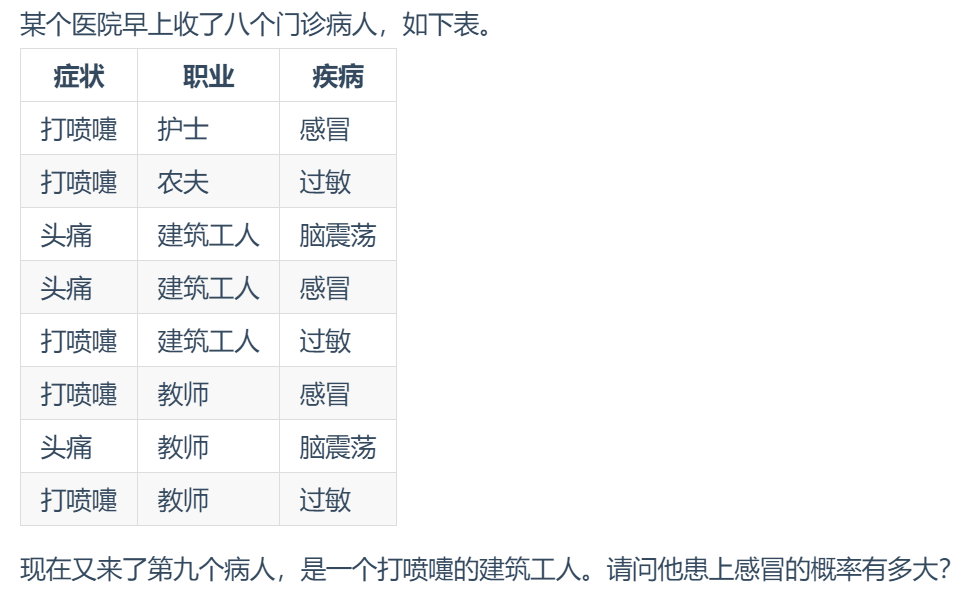

In [417]:
data = '''
症状 : 打喷嚏|打喷嚏|头痛|头痛|打喷嚏|打喷嚏|头痛|打喷嚏
职业 : 护士|农夫|建筑工人|建筑工人|建筑工人|教师|教师|教师
疾病 : 感冒|过敏|脑震荡|感冒|过敏|感冒|脑震荡|过敏
'''

In [429]:
resolution_data = {}
for e  in data.split('\n'):
    if e.strip() == '' :continue
    key, values = e.split(':') # ' 感冒|过敏|脑震荡|感冒|过敏|感冒|脑震荡|过敏'
    resolution_data[key.strip()] = [e.strip() for e in values.split('|')]

In [430]:
resolution_data

{'症状': ['打喷嚏', '打喷嚏', '头痛', '头痛', '打喷嚏', '打喷嚏', '头痛', '打喷嚏'],
 '职业': ['护士', '农夫', '建筑工人', '建筑工人', '建筑工人', '教师', '教师', '教师'],
 '疾病': ['感冒', '过敏', '脑震荡', '感冒', '过敏', '感冒', '脑震荡', '过敏']}

In [431]:
def evidence_and_prior(strings, resolution_data= {}):  # 先验概率 P(Y), 经验 P(X)
    plists = []
    for value in strings:
        for elements in resolution_data.items():
            values = elements[1]
            if values.count(value) == 0: continue
            plists.append(values.count(value) / len(values))
        
    return   plists

In [432]:
def likelihood(strings, resolution_data = {}): # 似然概率 P(X|Y), 
    plists = []
    y = strings[-1]  # 疾病的特征
    y_set = list(resolution_data.values())[-1]  # 拿到最后一个元素集
    length = len(y_set)
    y_count = y_set.count(y)
    for value in strings[:-1]:
    
        value_count = 0
        
        for e in list(resolution_data.values())[:-1]:
            temp = []
            temp = e.copy()
            if temp.count(value) == 0: continue
            temp.extend(y_set)
            for i in range(length):
                if temp[i + length] == y and temp[i] == value:
                    value_count += 1
        plists.append(value_count / y_count)
        
    return plists

In [437]:
def bayes(evidence1, evidence2, prior,likelihood1, likelihood2):
    return  (prior * likelihood1 * likelihood2) / (evidence1 * evidence2)

In [433]:
# X1, X2, Y= input().split() # 症状 职业 疾病
strings = input().strip().split() # 症状 职业 疾病    eg:打喷嚏 建筑工人 感冒

打喷嚏 建筑工人 感冒


In [434]:
evidence1, evidence2, prior = evidence_and_prior(strings, resolution_data)
likelihood1, likelihood2 = likelihood(strings, resolution_data)

In [435]:
print(evidence1, evidence2, prior)
print(likelihood1, likelihood2)

0.625 0.375 0.375
0.6666666666666666 0.3333333333333333


In [440]:
# 结果 后验概率 P(Y|X)---->(X--->X1, X2, X3...)
result = bayes(evidence1, evidence2, prior,likelihood1, likelihood2)

In [443]:
result   # 16/45

0.3555555555555555